## Canard orbits

#### The van der Pol equation

\begin{aligned}
\dot { x } & = x - \frac { x ^ { 3 } } { 3 } +  u\\
\dot { u } & = \varepsilon(\lambda - x )
\end{aligned}

Canard explosion for $\varepsilon = 0.05$ and $\lambda \approx 0.993491$

#### Folded singularity

The fold point $(x_0,y_0) = (0,0)$ at $\lambda_0 = 0$ satisfies

\begin{align}
f ( 0,0,0,0 ) &=& 0\\
f _ { x } ( 0,0,0,0 ) &=& 0\\
f _ { x x } ( 0,0,0,0 ) &=& 2 \neq 0\\
f _ { u } ( 0,0,0,0 ) &=& -1 \neq 0
\end{align}

This singularity is *generic* because
\begin{align}
g_x(0,0,0,0) &=& 1 \neq 0\\
g_\lambda (0,0,0,0) &=& -1 \neq 0
\end{align}


For a maximal canard, $\lambda_c (\sqrt{\varepsilon}) = -\frac{\varepsilon}{8} + O(\varepsilon^{\frac{3}{2}})$.

In [1]:
%run net_sym.py
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import pylab

In [2]:
eps = 0.05
l = 0.99374
f_t_vdp = lambda t,x: np.array([x[0]-(x[0]**3)/3+x[1], eps*(l-x[0])])

In [3]:
res_vdp = solve_ivp(fun=f_t_vdp, t_span=[0,100], y0=np.array([2.0,1.0]))

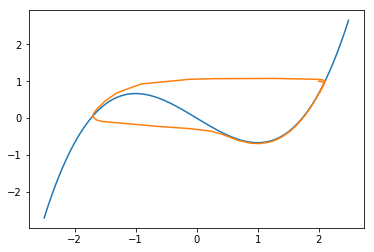

In [4]:
x_range = np.arange(-2.5,2.5,0.01)
plt.plot(x_range, x_range**3/3-x_range)
plt.plot(res_vdp.y[0], res_vdp.y[1], '-')

Dynamics on the network:

\begin{align}
\dot{\mathbf{x}} &=& -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u) \\
\dot{u} &=& \varepsilon (\lambda - \frac{\mathbf{1}_N^T\mathbf{x}}{N})
\end{align}

where $S(x,u) = 2x - \frac{x^3}{3} + u$.

The reduced equations look as follows:
\begin{align}
\dot{x} &= x - \frac{x^3}{3} + u &=: f(x,u,\lambda,\varepsilon)\\
\dot{u} &= \varepsilon (\lambda - x) &=: \varepsilon g(x,u,\lambda,\varepsilon)
\end{align}

In [5]:
N = 2
g = get_strongly_connected_digraph(N)
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

In [6]:
L = D - A

In [7]:
s_xu = lambda x,u: 2*x - np.power(x,3)/3 + u
phi_xu = lambda x,u: x - s_xu(x,u)

p1 = np.argmin(s_xu(x_range[0:100], -1))
p2 = 200 + np.argmax(s_xu(x_range[200:], -1))

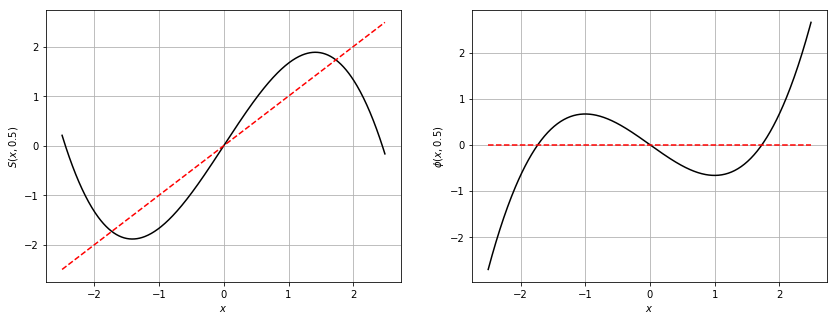

In [8]:
u = 0
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(x_range, s_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, x_range, linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$S(x,0.5)$')
plt.grid()

plt.subplot(122)
plt.plot(x_range, phi_xu(x_range, u), linestyle='-', color="black")
plt.plot(x_range, np.repeat(0,np.size(x_range)), linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,0.5)$')
plt.grid()

In [9]:
eps = 0.05
init = 2.2 + np.random.rand(N)/10
l = 0.994768
f_t = lambda t,x:np.append(-D.dot(x[:-1]) + A.dot(s_xu(x[:-1],x[-1])), eps*(l - np.mean(x[:-1])))
res2 = solve_ivp(fun=f_t, t_span=[0,150], y0=np.append(init, 1.0))
l = 0.993694
res3 = solve_ivp(fun=f_t, t_span=[0,150], y0=np.append(init, 1.0))

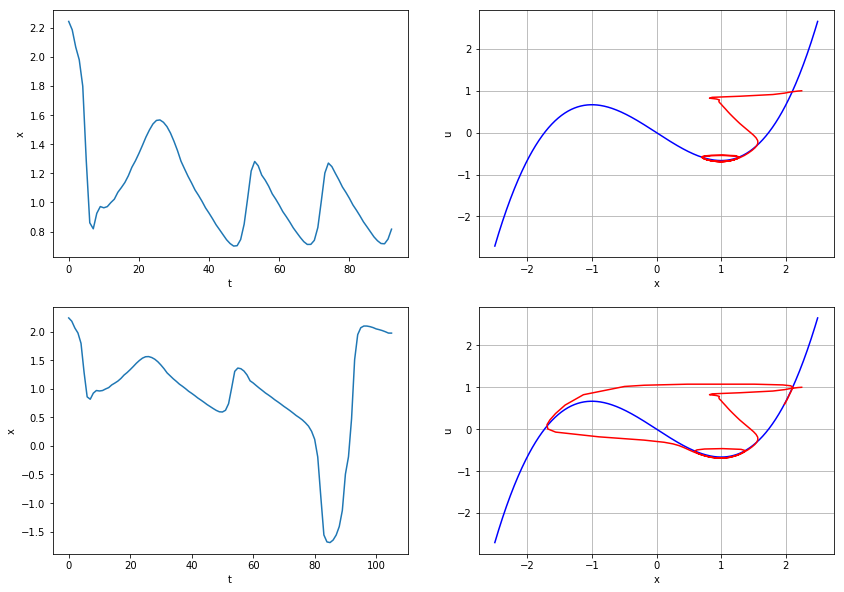

In [10]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(res2.y[0,:])
plt.xlabel("t")
plt.ylabel("x")

plt.subplot(222)
plt.plot(x_range, phi_xu(x_range,0), color='blue')
plt.plot(res2.y[0,:], res2.y[-1,:], '-', color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()

plt.subplot(223)
plt.plot(res3.y[0,:])
plt.xlabel("t")
plt.ylabel("x")

plt.subplot(224)
plt.plot(x_range, phi_xu(x_range,0), color='blue')
plt.plot(res3.y[0,:], res3.y[-1,:], '-', color='red')
plt.xlabel('x')
plt.ylabel('u')
plt.grid()


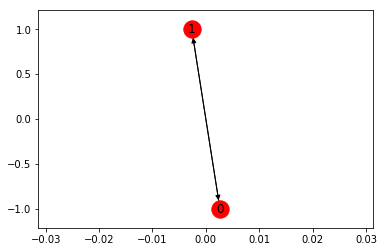

In [11]:
nx.draw_networkx(g)